In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import kagglehub
import os

In [2]:
# Download latest version of the dataset
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

# Join the directory path with the filename
file_path = os.path.join(path, "diabetes.csv")

# Load the CSV
df = pd.read_csv(file_path, header=0)

Using Colab cache for faster access to the 'diabetes-dataset' dataset.


In [3]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# check if any null value is present
df.isnull().values.any()

np.False_

In [6]:
#Selecting features
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols]
y = df.Outcome

In [7]:
#Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
print("Number of zeros in each feature column:")
for col in X.columns:
    zero_count = (X[col] == 0).sum()
    print(f"{col}: {zero_count}")

Number of zeros in each feature column:
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [9]:
df.shape

(768, 9)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Index 0 = Pregnancies (Stay as is)
# Index 1-7 = Glucose, BP, Skin, Insulin, BMI, Pedigree, Age (Replace 0s)

ct = ColumnTransformer(
    transformers=[
        ('keep_preg', 'passthrough', [0]),
        ('fix_others', SimpleImputer(missing_values=0, strategy='mean'), [1, 2, 3, 4, 5, 6, 7])
    ]
)

# X_train is now cleaned: Pregnancies still has 0s, others do not.
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [17]:
pd.DataFrame(X_train).head(20)

,0,1,2,3,4,5,6,7
0,7.0,184.0,84.0,33.000000,149.953737,35.5,0.355,41.0
1,6.0,85.0,78.0,28.839474,149.953737,31.2,0.382,42.0
2,2.0,106.0,64.0,35.000000,119.000000,30.5,1.400,34.0
3,2.0,100.0,54.0,28.000000,105.000000,37.8,0.498,24.0
4,5.0,104.0,74.0,28.839474,149.953737,28.8,0.153,48.0
5,3.0,174.0,58.0,22.000000,194.000000,32.9,0.593,36.0
6,0.0,152.0,82.0,39.000000,272.000000,41.5,0.270,27.0
7,2.0,90.0,60.0,28.839474,149.953737,23.5,0.191,25.0
8,7.0,136.0,90.0,28.839474,149.953737,29.9,0.210,50.0
9,2.0,71.0,70.0,27.000000,149.953737,28.0,0.586,22.0


In [18]:
#Import the class
from sklearn.linear_model import LogisticRegression

#Initiate the model
logreg = LogisticRegression(random_state=42, solver='liblinear')

#Fit the model
logreg.fit(X_train, y_train)

#Predicting
y_pred = logreg.predict(X_test)

In [19]:
import pandas as pd

# 1. Get the coefficients from your model
# (Assumes your model is named 'classifier')
importance = logreg.coef_[0]

# 2. Match them with your column names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# 3. Sort by importance to see the "winners"
print(feature_importance.sort_values(by='Importance', ascending=False))

         Feature  Importance
6       Pedigree    0.379022
0    Pregnancies    0.133150
5            BMI    0.072688
1        Glucose    0.029917
7            Age    0.001568
4        Insulin    0.000283
3  SkinThickness   -0.016468
2  BloodPressure   -0.023812


In [20]:
#Import metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[131,  19],
       [ 39,  42]])

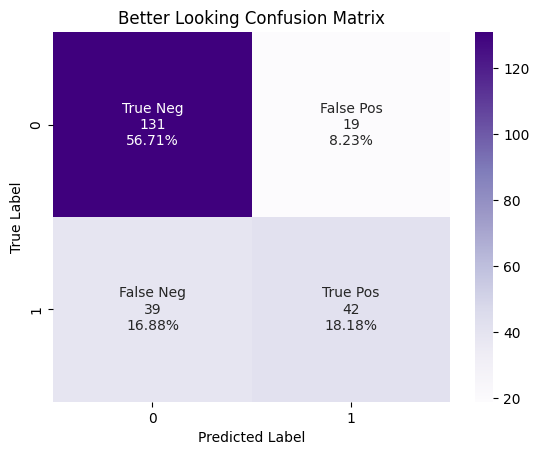

In [21]:
import matplotlib.pyplot as plt
#Visualizing the results of confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Better Looking Confusion Matrix')
plt.show()

In [22]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.77      0.87      0.82       150
   with diabetes       0.69      0.52      0.59        81

        accuracy                           0.75       231
       macro avg       0.73      0.70      0.71       231
    weighted avg       0.74      0.75      0.74       231



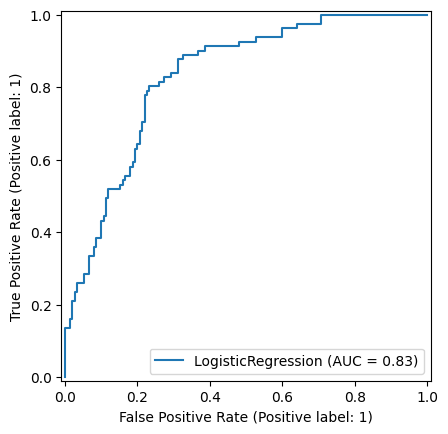

In [23]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(logreg, X_test, y_test)

In [24]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

/tmp/ipython-input-1820657102.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  random_forest_model.fit(X_train, y_train.ravel())


RandomForestClassifier(random_state=10)

In [25]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.758


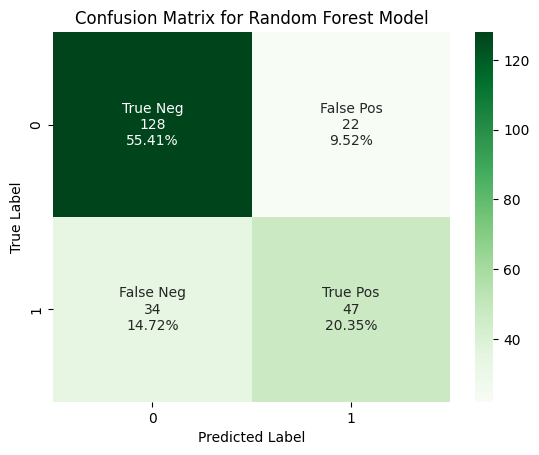

In [26]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Calculate the confusion matrix for the Random Forest model
cnf_matrix_rf = metrics.confusion_matrix(y_test, predict_train_data)

# Visualizing the results of confusion matrix for Random Forest
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_rf.flatten()/np.sum(cnf_matrix_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_rf, annot=labels, fmt='', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [27]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, predict_train_data, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.79      0.85      0.82       150
   with diabetes       0.68      0.58      0.63        81

        accuracy                           0.76       231
       macro avg       0.74      0.72      0.72       231
    weighted avg       0.75      0.76      0.75       231



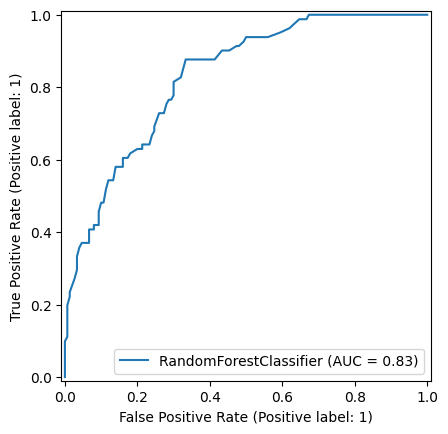

In [28]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(random_forest_model, X_test, y_test)